# **Project: Rossman Sales Store**

## **I. Dataset Description:**

* **Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied [Datasource](https://www.kaggle.com/competitions/rossmann-store-sales/overview)** 

## **1. Loading the Dependencies**

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  make_scorer, mean_squared_error, accuracy_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
print("All library models loaded successfully")

All library models loaded successfully


## **2. Loading Dataset**

In [284]:
Train_data = pd.read_csv("train.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_7320\2074100725.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_data = pd.read_csv("train.csv")


In [285]:
Test_data = pd.read_csv("test.csv")

In [286]:
Store_data = pd.read_csv("store.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### I. **Head or First 5 rows of data**

In [287]:
Train_data.head(5) # First 5 rows of train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [288]:
Test_data.head(5) # First 5 rows of testing data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [289]:
Store_data.head(5) # First 5 rows of store data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### **II. Size of dataset: shape**

In [290]:
Train_data.shape # Shape of Train_data

(1017209, 9)

In [291]:
Test_data.shape

(41088, 8)

In [292]:
Store_data.shape

(1115, 10)

### **III. Data Columns**

In [293]:
Train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [294]:
Test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [295]:
Store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### **IV. Data Types and the Number of These Categories: Nominal and Ordinal Data Type:**

In [296]:
Train_num = Train_data.select_dtypes(include = [np.number]).columns.to_list()

In [297]:
Train_num

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

#### **Observation: We have _seven column features_ being numerical**

In [298]:
Test_num = Test_data.select_dtypes(include = [np.number]).columns.to_list()

In [299]:
Test_num

['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday']

In [300]:
len(Test_num)

6

#### **Observation: We have _six_ column features_ being numerical**

In [301]:
Store_num = Store_data.select_dtypes(include = [np.number]).columns.to_list()

In [302]:
Store_num

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [303]:
len(Store_num)

7

### **V. Information About Dataset**

In [304]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### **NB: No missing values in the Train dataset**

In [305]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### **NB: One feature column - _Open_ has a missing value**

In [306]:
Store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### **NB: Store dataset has 7 feature columns with missing values**

### **VI. Statistical Description of Dataset**

In [307]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [308]:
Test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.500000,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.979167,2.015481,1.0,2.00,4.0,6.00,7.0
Open,41077.0,0.854322,0.352787,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.395833,0.489035,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.443487,0.496802,0.0,0.00,0.0,1.00,1.0


In [309]:
Store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


### **VII. Checking for NaN or missing values and sorting in ascending order**

#### **NB: We observeed that Train_data has no missing values in all feature columns**

In [310]:
Test_data.isna().sum().sort_values(ascending  = True)

Id                0
Store             0
DayOfWeek         0
Date              0
Promo             0
StateHoliday      0
SchoolHoliday     0
Open             11
dtype: int64

In [311]:
((Test_data.isna().sum())/len(Test_data)*100).sort_values(ascending = True)

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
Open             0.026772
dtype: float64

#### **NB: We observe that **_Open_** has 0.02672 % of missing values**

In [312]:
Store_data.isna().sum().sort_values(ascending  = True)

Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [313]:
((Store_data.isna().sum())/len(Store_data)*100).sort_values(ascending = True)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
Promo2                        0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#### **Store has a lot of missing values greater than 5% so we handle those missing values using KNN - Imputer**

## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

*  **Identifying duplicates: General duplicates checking**
*  **Changing of misappropriated data types**
*  **Checking for missing valus or NaN values**
*  **Proper alignment or positioning of feature columns**

### **I. Identifying Duplicates: General Duplicates Checking**

In [314]:
# Train_data:
Train_data.duplicated(keep = "first").sum()

0

In [315]:
# Test_data
Test_data.duplicated(keep = "first").sum()

0

In [316]:
Store_data.duplicated(keep = "first").sum()

0

#### **NB: We have no duplicates in all the dataset given**

### **II. Changing of Misappropriated Data types**

In [317]:
# Train_data:
Train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [318]:
Train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [319]:
Test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [320]:
Store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

#### **NB: All data types in-checked**

#### **NB: ALL other Processes of the _First_Data Cleaning_ Steps remain constant**

## 5. Feature Enginering Process: **_Second Data Cleaning Steps_**

### **Handling of All Missing Values**

In [321]:
# Test_dataset
Test_data["Open"].value_counts()

Open
1.0    35093
0.0     5984
Name: count, dtype: int64

<Axes: xlabel='Open', ylabel='Count'>

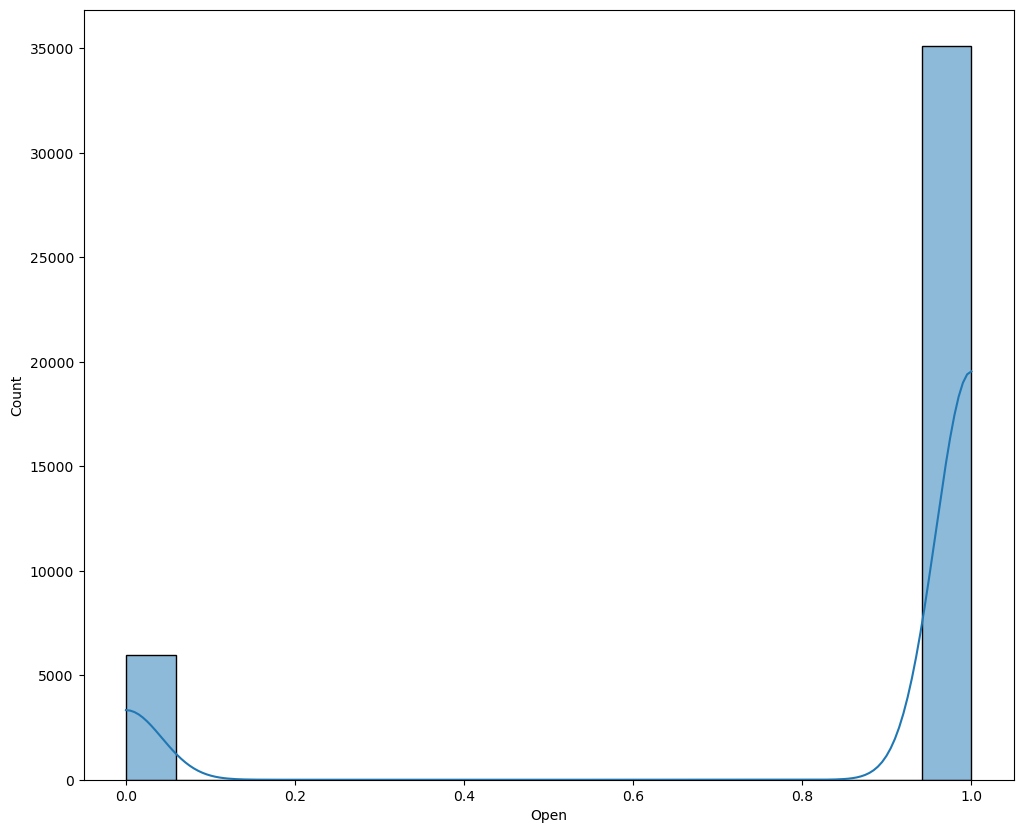

In [322]:
sns.histplot(Test_data["Open"], kde = True)

In [323]:
Pt = PowerTransformer(method = 'yeo-johnson') # Ensures a normal distribution of both postive and negative datasets

In [324]:
#Test_data["Open"] = Pt.fit_transform(Test_data[["Open"]])

In [325]:
# We impute with the "Mean" and "Median" to Check how both compare

In [326]:
Test_data["Open"] = Test_data["Open"].fillna(Test_data["Open"].mean())

In [327]:
Test_data.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [328]:
Test_data["Open"].std()

0.35273980102189745

<Axes: xlabel='CompetitionDistance', ylabel='Count'>

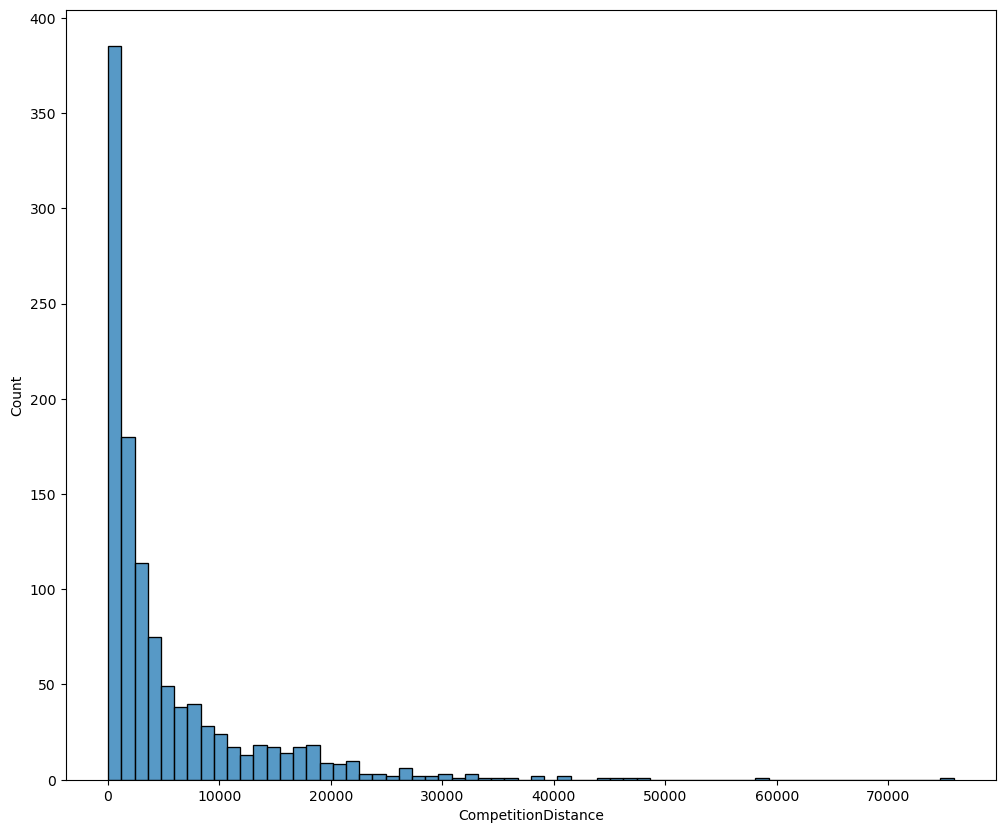

In [329]:
# Store_dataset
sns.histplot(Store_data["CompetitionDistance"])

### **This is a positively skewed feature column**

In [330]:
skewness_transformed = Store_data["CompetitionDistance"].skew()

In [331]:
print("The skewness of the dataset is:", skewness_transformed)

The skewness of the dataset is: 2.9292856455312055


In [332]:
Store_data["CompetitionDistance"] = np.log1p(Store_data["CompetitionDistance"])

In [333]:
skewness_transformed = Store_data["CompetitionDistance"].skew()

In [334]:
print("The skewness of the dataset is after log transformed:", skewness_transformed)

The skewness of the dataset is after log transformed: -0.3512040626565795


In [335]:
Store_data["CompetitionDistance"] = Pt.fit_transform(Store_data[["CompetitionDistance"]])

#### **NB: Finally Imputing with the mean of the dataset**

In [336]:
Store_data["CompetitionDistance"] = Store_data["CompetitionDistance"].fillna(Store_data["CompetitionDistance"].mean())

### **We apply Knn Imputer to columns of missing values greater than 5 %**

#### **First we drop off PromoInterval as it is irrelevant to the model builidng and analysis**

In [337]:
Store_data.drop(columns = ["PromoInterval"], axis = 1, inplace = True)

In [338]:
cols_for_knn = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]

In [339]:
Imputer = KNNImputer(n_neighbors = 5)

In [340]:
Store_data[cols_for_knn] = Imputer.fit_transform(Store_data[cols_for_knn])

In [341]:
((Store_data.isna().sum())/len(Store_data)*100).sort_values(ascending = True)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
dtype: float64

In [342]:
Store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

#### **All missing values have been handelled successfully**

## 6. Feature Enginering Process: **_Data Visualization_**

In [343]:
## Performing Visualization on the Training_data
Train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### **I. Data visualization of number of _customers per day_**

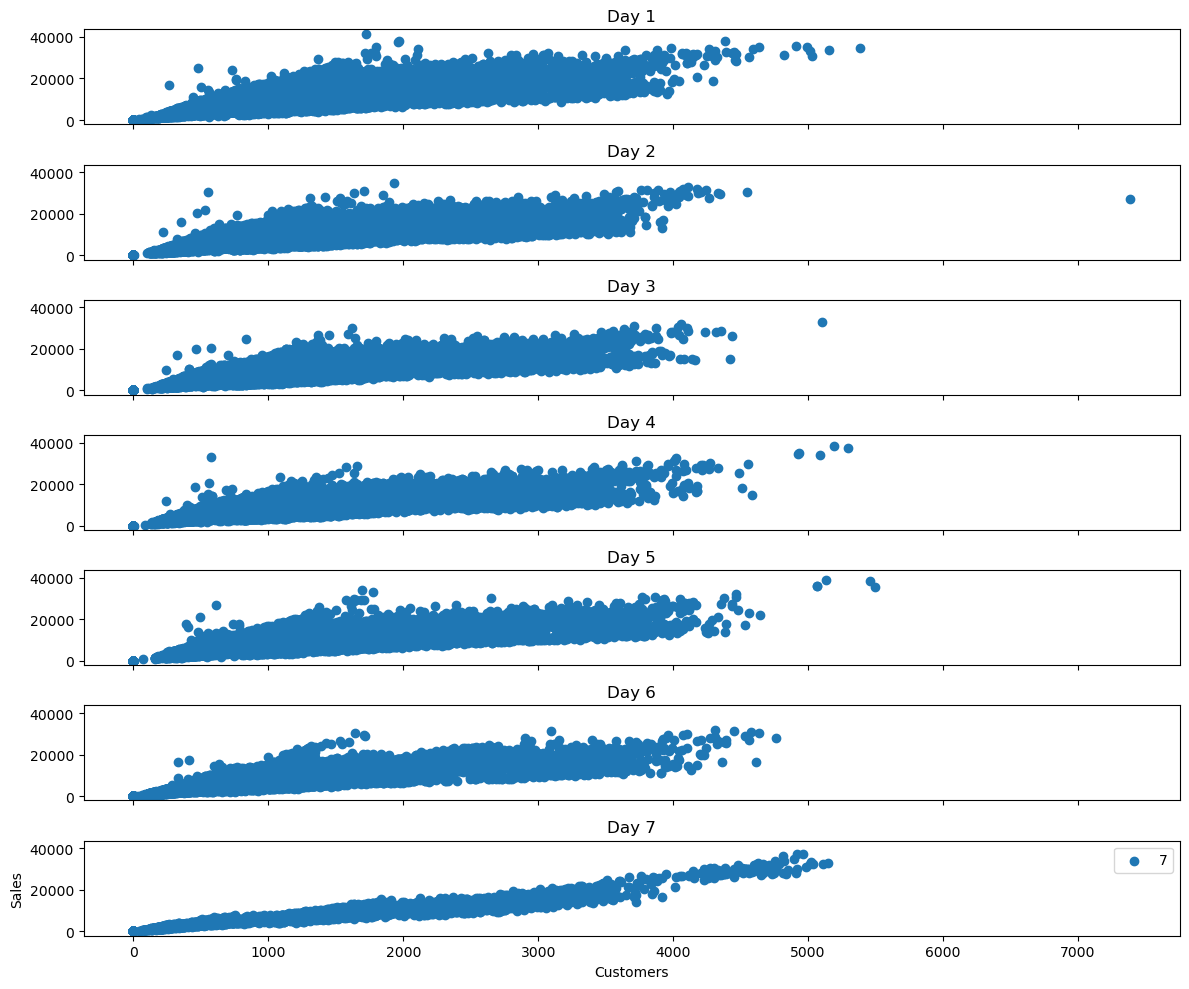

In [344]:
plt.rcParams["figure.figsize"] = (12.0, 10.0)

f, ax = plt.subplots(7, sharex = True, sharey = True)
for i in range(1, 8):
    data  = Train_data[Train_data["DayOfWeek"] == i]
    ax[i-1].set_title("Day {}".format(i))
    ax[i-1].scatter(data["Customers"], data["Sales"], label = i)

plt.legend()
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

#### **Observation: Sales made is linearly related to the number of customers i.e, higher sales imply more customers on that day**

### **II. Effect of _School Holidays on Sales_**

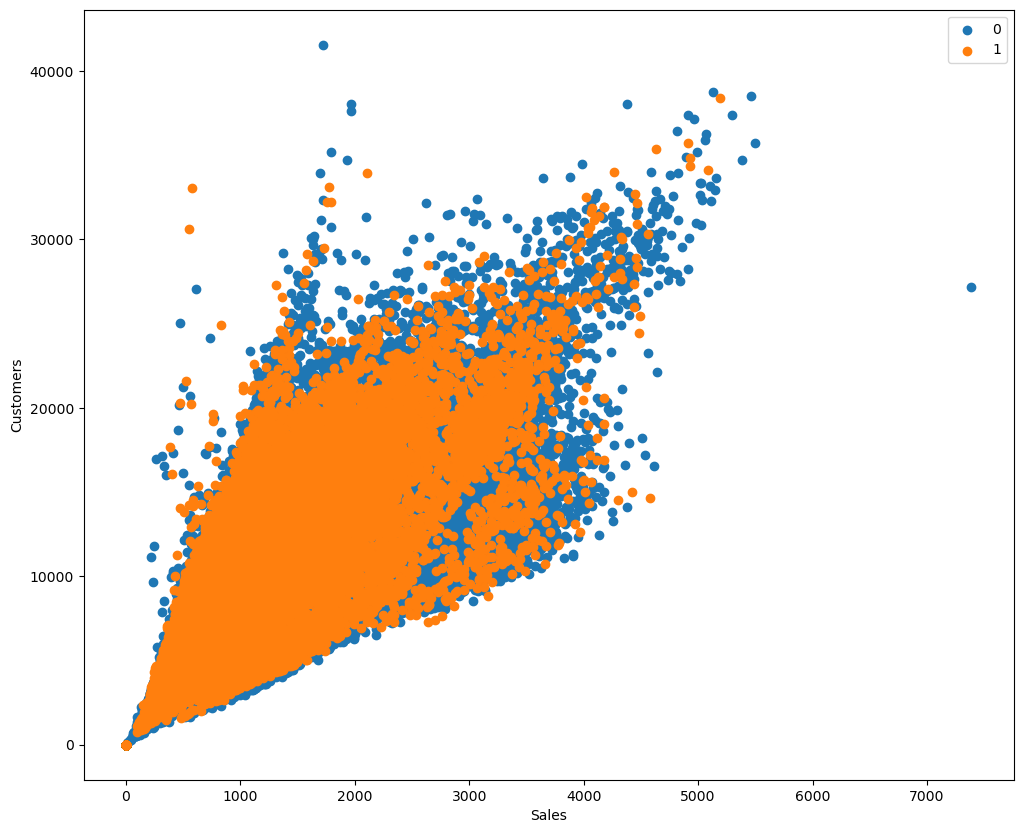

In [345]:
# School Holidays on Sales:
for i in [0, 1]:
    data = Train_data[Train_data["SchoolHoliday"] == i]  # Checking for schoolHoliday which is 1 and No Holiday which is 0
    if len(data) == 0:
        continue
    plt.scatter(data["Customers"], data["Sales"], label = i)

plt.legend()
plt.ylabel("Customers")
plt.xlabel("Sales")
plt.show()

#### **Observation: School holidays increase the number of customers, and hence more sales are generated**

### **III. Checking for the effect of _Promotions offered by Shops on Customers and Sales_:**

In [346]:
Train_data["Promo"].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

#### **1---> Run Promotions and 0-----> Run no promotions**

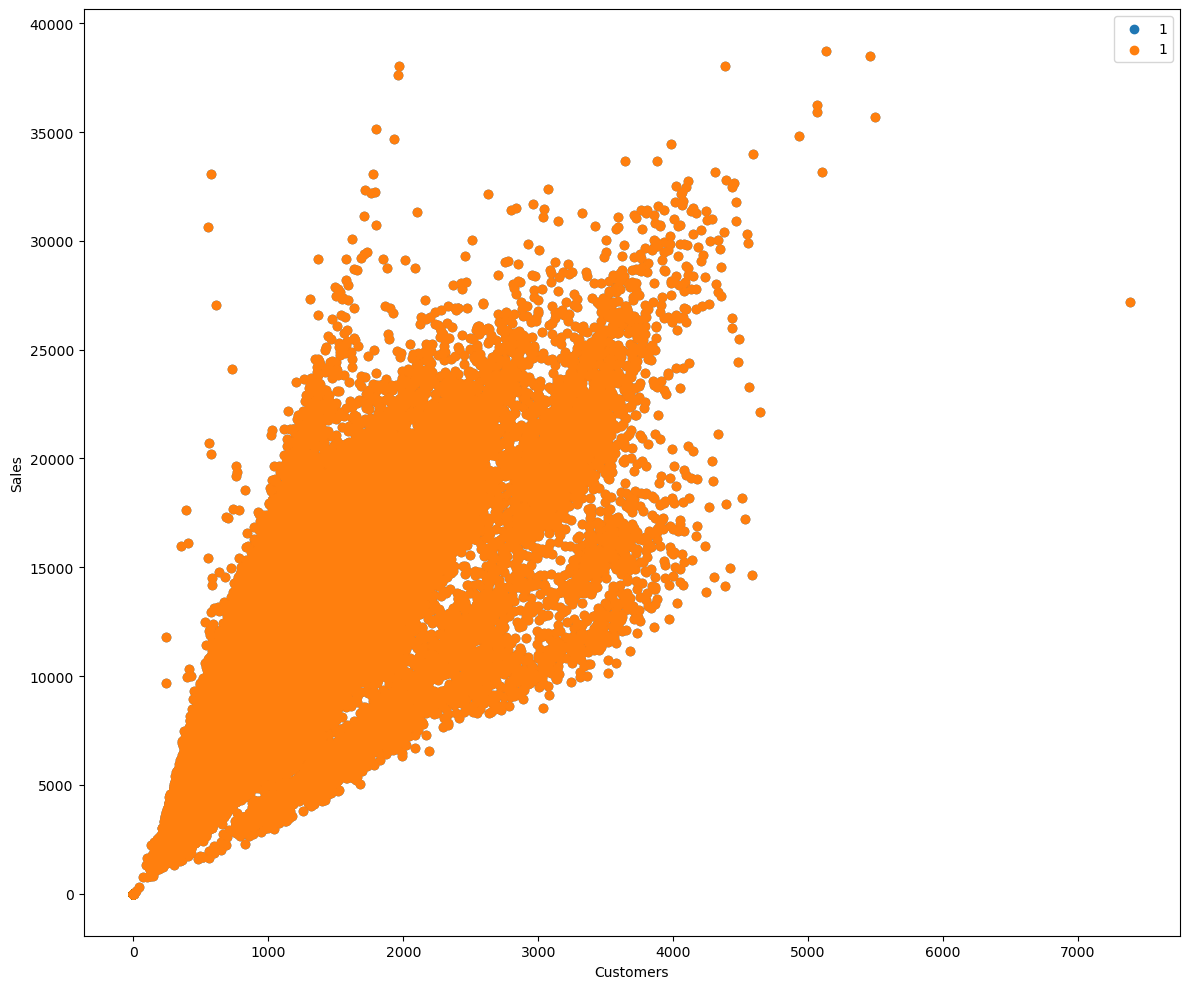

In [347]:
for x in [ 0, 1]:
    data = Train_data[Train_data["Promo"] == i]
    if len(data) == 0:
        continue
    plt.scatter(data["Customers"], data["Sales"], label = i)

plt.legend()
plt.ylabel("Sales")
plt.xlabel("Customers")
plt.tight_layout()
plt.show()

#### **_Observations_: _Promotions run by the shops increase sales on a regularly_**

In [348]:
Train_data["SalesPerColumn"] = Train_data["Sales"]/Train_data["Customers"]

# Merging Store_data and SalesPerColumn:
Store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,a,a,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,a,a,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,c,c,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,a,a,1.871357,4.0,2015.0,0,27.4,2011.4


In [349]:
Train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerColumn
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [350]:
Avg_store = Train_data.groupby("Store")[["Sales", "Customers", "SalesPerColumn"]].mean()
Avg_store.rename(columns = lambda x: "Avg " + x, inplace = True)
store  = pd.merge(Avg_store.reset_index(), Store_data, on = "Store")
store.head()

,Store,Avg Sales,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,3945.704883,467.646497,8.393038,c,a,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,4122.991507,486.045648,8.408443,a,a,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5741.253715,620.286624,9.117599,a,a,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,8021.769639,1100.057325,7.249827,c,c,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,3867.110403,444.360934,8.611229,a,a,1.871357,4.0,2015.0,0,27.4,2011.4


#### **_Checking for the number of Stores and their total quantities_**

In [351]:
store.StoreType.value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

#### **How much sales is made on customers by each store in average:**

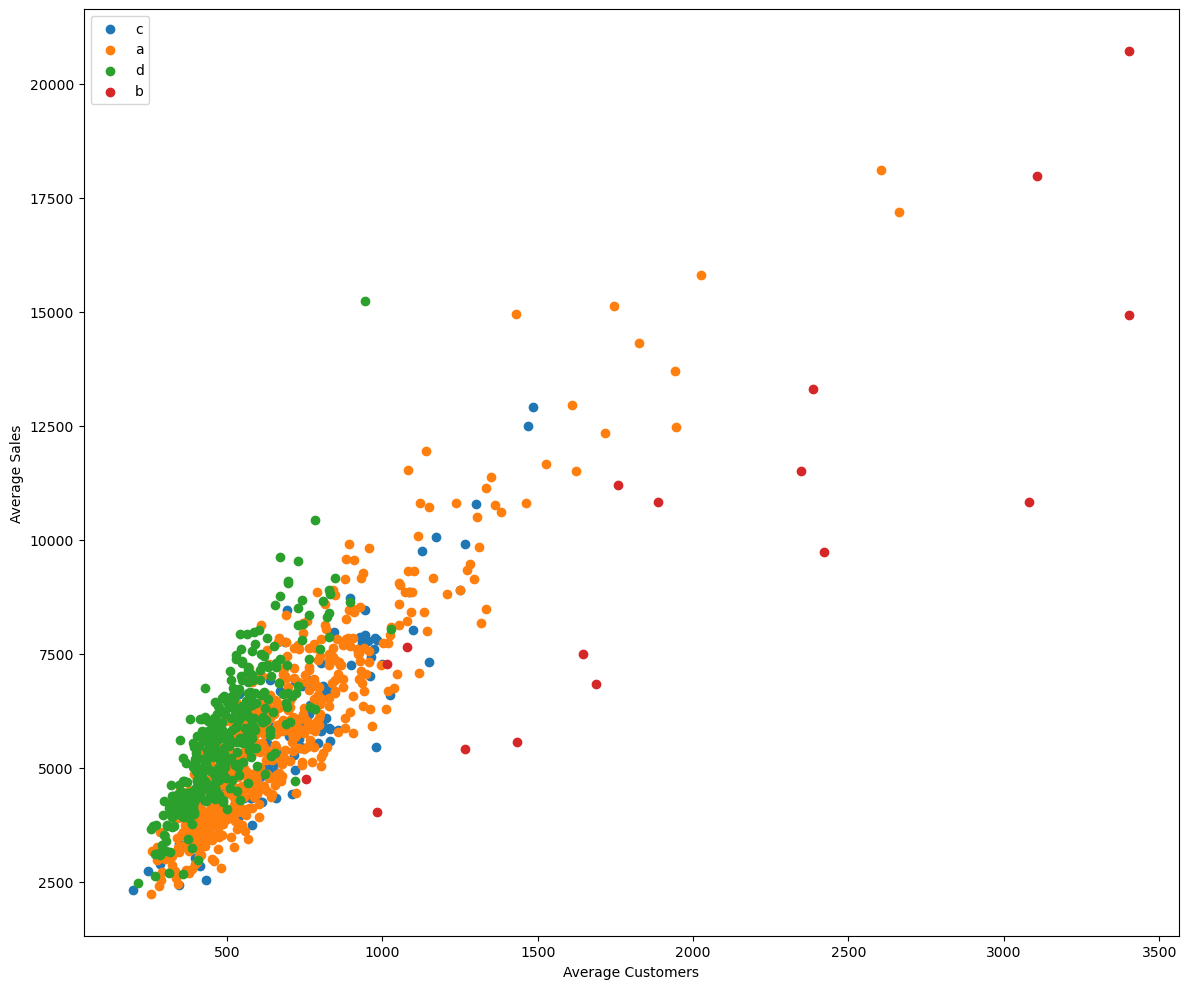

In [352]:
for i in store.StoreType.unique():
    data = store[store["StoreType"] == i]
    if len(data) ==0:
        continue
    plt.scatter(data["Avg Customers"], data["Avg Sales"], label = i)

plt.legend()
plt.xlabel("Average Customers")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

#### **_Observation_: Shop "a" has more customers and hence makes much sales than rest of the shops**

## 7. Feature Enginering Process: **_Feature Transformation_**

In [353]:
# Merging of store with Train_data
store.head(5)

,Store,Avg Sales,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,3945.704883,467.646497,8.393038,c,a,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,4122.991507,486.045648,8.408443,a,a,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5741.253715,620.286624,9.117599,a,a,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,8021.769639,1100.057325,7.249827,c,c,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,3867.110403,444.360934,8.611229,a,a,1.871357,4.0,2015.0,0,27.4,2011.4


In [354]:
Train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerColumn
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


In [355]:
store["StoreType"] = store["StoreType"].astype("category").cat.codes
store["Assortment"] = store["Assortment"].astype("category").cat.codes

Train_data["StateHoliday"] = Train_data["StateHoliday"].astype("category").cat.codes
store.head()

,Store,Avg Sales,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,3945.704883,467.646497,8.393038,2,0,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,4122.991507,486.045648,8.408443,0,0,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5741.253715,620.286624,9.117599,0,0,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,8021.769639,1100.057325,7.249827,2,2,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,3867.110403,444.360934,8.611229,0,0,1.871357,4.0,2015.0,0,27.4,2011.4


In [356]:
merged_data = pd.merge(Train_data, store, on ="Store", how = "left")
merged_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerColumn,...,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,467.646497,8.393038,2,0,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,486.045648,8.408443,0,0,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,620.286624,9.117599,0,0,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,1100.057325,7.249827,2,2,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,444.360934,8.611229,0,0,1.871357,4.0,2015.0,0,27.4,2011.4


In [357]:
# New Size:
merged_data.shape

(1017209, 21)

In [358]:
merged_data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalesPerColumn               172869
Avg Sales                         0
Avg Customers                     0
Avg SalesPerColumn                0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
dtype: int64

In [359]:
merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'SalesPerColumn', 'Avg Sales',
       'Avg Customers', 'Avg SalesPerColumn', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

## 8. Feature Enginering Process: **_Feature Extraction_**

In [360]:
merged_data["Date"] = pd.to_datetime(merged_data["Date"])

In [361]:
merged_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerColumn,...,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,467.646497,8.393038,2,0,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,486.045648,8.408443,0,0,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,620.286624,9.117599,0,0,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,1100.057325,7.249827,2,2,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,444.360934,8.611229,0,0,1.871357,4.0,2015.0,0,27.4,2011.4


#### **Extraction of Year, Month and Day from date:**

In [362]:
merged_data["Year"] = merged_data.Date.dt.year # Extraction of Year
merged_data["Month"] = merged_data.Date.dt.month
merged_data["Day"] = merged_data.Date.dt.day
merged_data["Week"] = merged_data.Date.dt.isocalendar().week

In [363]:
merged_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerColumn,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,Week
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,-0.385961,9.0,2008.0,0,12.4,2011.6,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,-0.874529,11.0,2007.0,1,13.0,2010.0,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,1.289580,12.0,2006.0,1,14.0,2011.0,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,-0.824931,9.0,2009.0,0,15.8,2011.8,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,1.871357,4.0,2015.0,0,27.4,2011.4,2015,7,31,31


In [364]:
# Number of months that competition has existed for
merged_data["MonthsCompetitionOpened"] = 12*(merged_data["Year"] - merged_data["CompetitionOpenSinceYear"]) + (merged_data["Month"] - merged_data["CompetitionOpenSinceMonth"])
merged_data.loc[merged_data["CompetitionOpenSinceYear"] ==0, "MonthsCompetitionOpened"] = 0

In [365]:
merged_data["weeksPromoOpen"] = 12*(merged_data["Year"] - merged_data["Promo2SinceYear"]) + (merged_data["Date"].dt.isocalendar().week - merged_data["Promo2SinceWeek"])
merged_data.loc[merged_data["Promo2SinceYear"] ==0, "weeksPromoOpen"] = 0

In [366]:
merged_data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerColumn                      float64
Avg Sales                           float64
Avg Customers                       float64
Avg SalesPerColumn                  float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
Year                                  int32
Month                           

## 9. Feature Enginering Process: **_Feature Transformation_**

#### **I. Changing of Misappropriated Data types**

In [367]:
Toint = ["CompetitionOpenSinceMonth", 
         "CompetitionOpenSinceYear", 
          "Promo2SinceWeek", 
          "Promo2SinceYear",
         "MonthsCompetitionOpened", 
         "weeksPromoOpen"]

In [368]:
merged_data[Toint] = merged_data[Toint].astype(int)

In [369]:
merged_data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerColumn                      float64
Avg Sales                           float64
Avg Customers                       float64
Avg SalesPerColumn                  float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
Year                                  int32
Month                           

## 10. Feature Enginering Process: **_Feature Construction_**

In [370]:
med_store = Train_data.groupby("Store")[["Sales", "Customers", "SalesPerColumn"]].mean()
med_store.rename(columns = lambda x: "med " + x, inplace = True)
New_store = pd.merge(med_store.reset_index(), store, on = "Store")

In [371]:
New_store.head()

,Store,med Sales,med Customers,med SalesPerColumn,Avg Sales,Avg Customers,Avg SalesPerColumn,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,3945.704883,467.646497,8.393038,3945.704883,467.646497,8.393038,2,0,-0.385961,9.0,2008.0,0,12.4,2011.6
1,2,4122.991507,486.045648,8.408443,4122.991507,486.045648,8.408443,0,0,-0.874529,11.0,2007.0,1,13.0,2010.0
2,3,5741.253715,620.286624,9.117599,5741.253715,620.286624,9.117599,0,0,1.289580,12.0,2006.0,1,14.0,2011.0
3,4,8021.769639,1100.057325,7.249827,8021.769639,1100.057325,7.249827,2,2,-0.824931,9.0,2009.0,0,15.8,2011.8
4,5,3867.110403,444.360934,8.611229,3867.110403,444.360934,8.611229,0,0,1.871357,4.0,2015.0,0,27.4,2011.4


In [372]:
med_store.head()

,med Sales,med Customers,med SalesPerColumn
Store,,,
1,3945.704883,467.646497,8.393038
2,4122.991507,486.045648,8.408443
3,5741.253715,620.286624,9.117599
4,8021.769639,1100.057325,7.249827
5,3867.110403,444.360934,8.611229


#### **Merging med_store with merged_data to form one complete dataset**

In [373]:
merged_new = pd.merge(med_store.reset_index(), merged_data, on = "Store")

In [374]:
merged_new.head()

,Store,med Sales,med Customers,med SalesPerColumn,DayOfWeek,Date,Sales,Customers,Open,Promo,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,Week,MonthsCompetitionOpened,weeksPromoOpen
0,1,3945.704883,467.646497,8.393038,5,2015-07-31,5263,555,1,1,...,2008,0,12,2011,2015,7,31,31,82,59
1,1,3945.704883,467.646497,8.393038,4,2015-07-30,5020,546,1,1,...,2008,0,12,2011,2015,7,30,31,82,59
2,1,3945.704883,467.646497,8.393038,3,2015-07-29,4782,523,1,1,...,2008,0,12,2011,2015,7,29,31,82,59
3,1,3945.704883,467.646497,8.393038,2,2015-07-28,5011,560,1,1,...,2008,0,12,2011,2015,7,28,31,82,59
4,1,3945.704883,467.646497,8.393038,1,2015-07-27,6102,612,1,1,...,2008,0,12,2011,2015,7,27,31,82,59


In [375]:
merged_new.columns

Index(['Store', 'med Sales', 'med Customers', 'med SalesPerColumn',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'SalesPerColumn', 'Avg Sales',
       'Avg Customers', 'Avg SalesPerColumn', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'Week',
       'MonthsCompetitionOpened', 'weeksPromoOpen'],
      dtype='object')

## 11. Feature Enginering Process: **_Feature Selection_**

In [376]:
X = ["Store", "Customers", "CompetitionDistance",
     "Promo", "Promo2",
     
     "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear",
     "StateHoliday", "StoreType", "Assortment",

     "Avg Sales",
     "Avg Customers",
     "Avg SalesPerColumn",

     "med Sales", 
     "med Customers",
     "med SalesPerColumn",

     "DayOfWeek",
     "Week",
     "Day",
     "Month",
     "Year" ]

#### **Data Splitting into X and y**

In [377]:
X_data = merged_new[X]

In [378]:
X_data.head(5)

,Store,Customers,CompetitionDistance,Promo,Promo2,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,StateHoliday,...,Avg Customers,Avg SalesPerColumn,med Sales,med Customers,med SalesPerColumn,DayOfWeek,Week,Day,Month,Year
0,1,555,-0.385961,1,0,9,2008,12,2011,1,...,467.646497,8.393038,3945.704883,467.646497,8.393038,5,31,31,7,2015
1,1,546,-0.385961,1,0,9,2008,12,2011,1,...,467.646497,8.393038,3945.704883,467.646497,8.393038,4,31,30,7,2015
2,1,523,-0.385961,1,0,9,2008,12,2011,1,...,467.646497,8.393038,3945.704883,467.646497,8.393038,3,31,29,7,2015
3,1,560,-0.385961,1,0,9,2008,12,2011,1,...,467.646497,8.393038,3945.704883,467.646497,8.393038,2,31,28,7,2015
4,1,612,-0.385961,1,0,9,2008,12,2011,1,...,467.646497,8.393038,3945.704883,467.646497,8.393038,1,31,27,7,2015


In [379]:
y_data = merged_new["Sales"]

C:\Users\hp\AppData\Local\Temp\ipykernel_7320\27476850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_data)


<Axes: xlabel='Sales', ylabel='Density'>

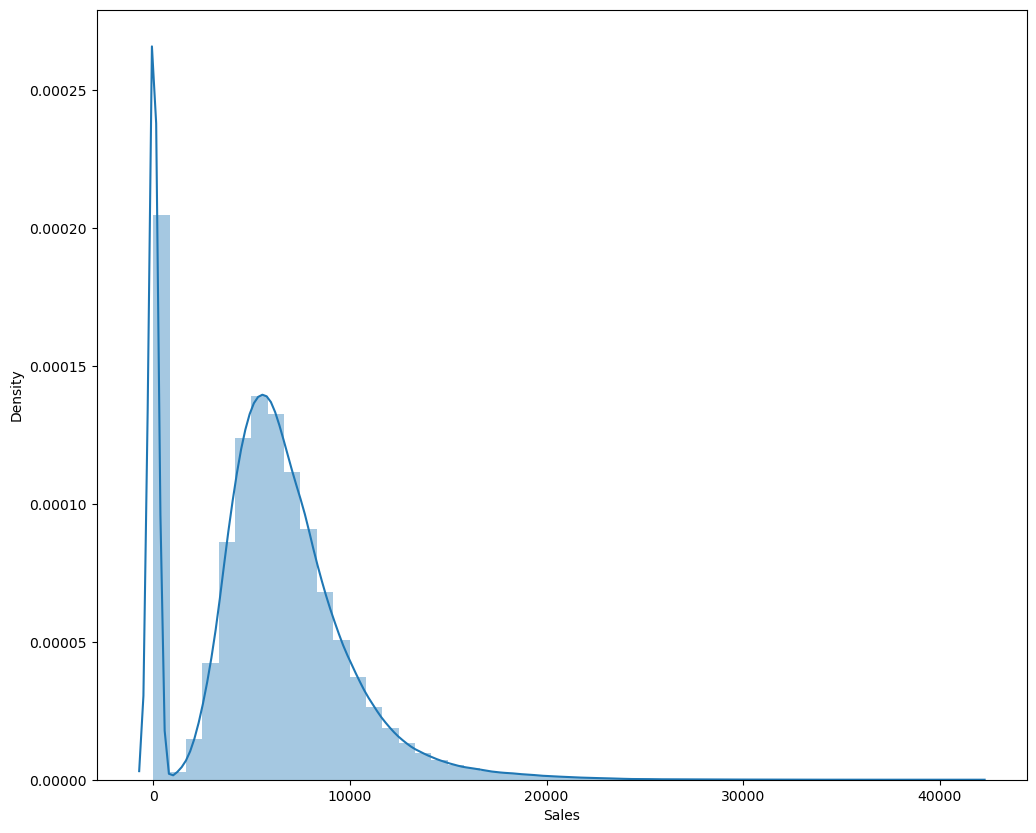

In [380]:
sns.distplot(y_data)

In [381]:
y_data =np.log1p(y_data) # Improving skewenss of the Sales feature

In [382]:
print(y_data)

0          8.568646
1          8.521384
2          8.472823
3          8.519590
4          8.716536
             ...   
1017204    8.470521
1017205    8.420903
1017206    8.365905
1017207    8.215547
1017208    0.000000
Name: Sales, Length: 1017209, dtype: float64


## 12. Feature Enginering Process: **_Feature Scaling_**

In [383]:
scaler = StandardScaler()

In [384]:
X_data = scaler.fit_transform(X_data)

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

## **Model Selection and Building**

In [386]:
model = XGBRegressor()

In [387]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## **Model Predictions:**

In [388]:
y_train_pred = model.predict(X_train)

In [389]:
# Calculating the rmse of the testing data
rmse_train = root_mean_squared_error(y_train, y_train_pred)
print("Root Mean Squared Error:", rmse_train)

Root Mean Squared Error: 0.05217798825323651


In [390]:
y_test_pred = model.predict(X_test)

In [392]:
# Calculating the rmse of the testing data
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print("Root Mean Squared Error:", rmse_test)

Root Mean Squared Error: 0.05341929371855276


#### **_Interpretations_: The final results indicate good model performance, as error difference between train and test and very close and low showing minimized risk of overfitting issues**